In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
#Variables
dataframe=pd.read_csv("ENB2012_data.csv", header=None)
dataset = dataframe.values
x=dataset[:,0:8]
y1=dataset[:,8]
y2=dataset[:,9]

y1=np.reshape(y1, (-1,1))
y2=np.reshape(y2, (-1,1))

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2)

In [3]:
# model initialization
regression_model1 = LinearRegression()

# fit the data(train the model)
regression_model1.fit(x1_train, y1_train)

# predict
y1_predicted = regression_model1.predict(x1_test)

# model evaluation
rmse = mean_squared_error(y1_test, y1_predicted)
r2 = r2_score(y1_test, y1_predicted)

# cross_val_score does cross validation for us (k folds, k=5)
accuracy = cross_val_score(regression_model1, x, y1, cv=5)

# we're setting the train_sizes here because the model is wildly variant with low training sizes for some reason
train_sizes, train_scores, test_scores = learning_curve(regression_model1, x, y1, train_sizes=[200, 350, 500, 600], cv=5)

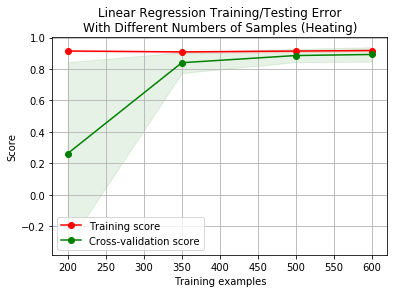

The coefficients are [[-6.46743161e+01 -6.21864777e-02  3.55957107e-02 -4.88910942e-02
   4.20340499e+00 -8.88649586e-02  1.87137515e+01  2.76374296e-01]]
The intercept is [83.87322043]
Root mean squared error of the model is 10.714331090728399.
R-squared score is 0.9026987336555148.
Accuracy is 0.8873627792622306


In [4]:
plt.figure()
plt.title("Linear Regression Training/Testing Error\nWith Different Numbers of Samples (Heating)")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# printing values
print('The coefficients are {}'.format(regression_model1.coef_))
print('The intercept is {}'.format(regression_model1.intercept_))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2))
print('Accuracy is {}'.format(accuracy.mean()))


In [5]:
# model initialization
regression_model2 = LinearRegression()

# fit the data(train the model)
regression_model2.fit(x2_train, y2_train)

# predict
y2_predicted = regression_model1.predict(x2_test)

# model evaluation
rmse = mean_squared_error(y2_test, y2_predicted)
r2 = r2_score(y2_test, y2_predicted)

accuracy = cross_val_score(regression_model1, x, y2, cv=5)

train_sizes, train_scores, test_scores = learning_curve(regression_model1, x, y2, train_sizes=[200, 350, 500, 600], cv=5)

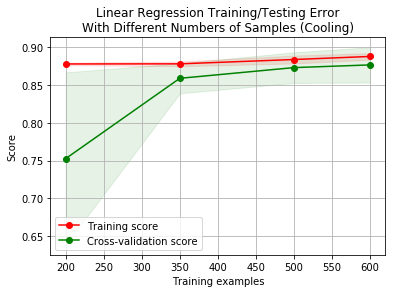

The coefficients are [[-7.52660870e+01 -6.87533888e-02  2.09176835e-02 -4.48355361e-02
   4.42646467e+00  1.93197806e-01  1.44414301e+01  1.22245645e-01]]
The intercept is [83.87322043]
Root mean squared error of the model is 13.71647622632594.
R-squared score is 0.8409866356857558.
Accuracy is 0.8728397046386904


In [6]:
plt.figure()
plt.title("Linear Regression Training/Testing Error\nWith Different Numbers of Samples (Cooling)")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# printing values
print('The coefficients are {}'.format(regression_model2.coef_))
print('The intercept is {}'.format(regression_model1.intercept_))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2))
print('Accuracy is {}'.format(accuracy.mean()))